In [2]:
import pandas as pd

In [5]:
df = pd.read_csv('../data/Sales.csv') 

In [6]:
df.head

<bound method NDFrame.head of               Date  Day     Month  Year  Customer_Age       Age_Group  \
0       2013-11-26   26  November  2013            19     Youth (<25)   
1       2015-11-26   26  November  2015            19     Youth (<25)   
2       2014-03-23   23     March  2014            49  Adults (35-64)   
3       2016-03-23   23     March  2016            49  Adults (35-64)   
4       2014-05-15   15       May  2014            47  Adults (35-64)   
...            ...  ...       ...   ...           ...             ...   
113031  2016-04-12   12     April  2016            41  Adults (35-64)   
113032  2014-04-02    2     April  2014            18     Youth (<25)   
113033  2016-04-02    2     April  2016            18     Youth (<25)   
113034  2014-03-04    4     March  2014            37  Adults (35-64)   
113035  2016-03-04    4     March  2016            37  Adults (35-64)   

       Customer_Gender         Country             State Product_Category  \
0               

In [7]:
df.shape

(113036, 18)

In [8]:
df.info

<bound method DataFrame.info of               Date  Day     Month  Year  Customer_Age       Age_Group  \
0       2013-11-26   26  November  2013            19     Youth (<25)   
1       2015-11-26   26  November  2015            19     Youth (<25)   
2       2014-03-23   23     March  2014            49  Adults (35-64)   
3       2016-03-23   23     March  2016            49  Adults (35-64)   
4       2014-05-15   15       May  2014            47  Adults (35-64)   
...            ...  ...       ...   ...           ...             ...   
113031  2016-04-12   12     April  2016            41  Adults (35-64)   
113032  2014-04-02    2     April  2014            18     Youth (<25)   
113033  2016-04-02    2     April  2016            18     Youth (<25)   
113034  2014-03-04    4     March  2014            37  Adults (35-64)   
113035  2016-03-04    4     March  2016            37  Adults (35-64)   

       Customer_Gender         Country             State Product_Category  \
0             

In [9]:
df['Day']=pd.to_datetime(df['Day'])

In [10]:


# Group by Year and calculate total revenue
yearly_revenue = df.groupby('Year')['Revenue'].sum().reset_index()
print(yearly_revenue)

   Year   Revenue
0  2011   8964888
1  2012   9175983
2  2013  15240037
3  2014  14152724
4  2015  20023991
5  2016  17713385


In [11]:
# Group by Product_Category and calculate total profit
category_profit = df.groupby('Product_Category')['Profit'].sum().reset_index()
print(category_profit)

  Product_Category    Profit
0      Accessories   8862377
1            Bikes  20519276
2         Clothing   2839447


In [12]:
# Group by Country and State, then calculate total sales
country_state_sales = df.groupby(['Country', 'State'])['Revenue'].sum().reset_index()
print(country_state_sales)

           Country                State   Revenue
0        Australia      New South Wales   9203495
1        Australia           Queensland   5066267
2        Australia      South Australia   1397274
3        Australia             Tasmania    580184
4        Australia             Victoria   5054839
5           Canada              Alberta     56803
6           Canada     British Columbia   7877890
7           Canada              Ontario      1045
8           France    Charente-Maritime    106047
9           France              Essonne    973532
10          France      Garonne (Haute)    183906
11          France       Hauts de Seine    937140
12          France         Loir et Cher     82533
13          France               Loiret    325172
14          France              Moselle    266223
15          France                 Nord   1324652
16          France        Pas de Calais     50413
17          France        Seine (Paris)   1643279
18          France    Seine Saint Denis   1131634


In [13]:
# Group by Age_Group and Customer_Gender, then calculate average order quantity
age_gender_analysis = df.groupby(['Age_Group', 'Customer_Gender'])['Order_Quantity'].mean().reset_index()
print(age_gender_analysis)

              Age_Group Customer_Gender  Order_Quantity
0        Adults (35-64)               F       11.944691
1        Adults (35-64)               M       12.142988
2         Seniors (64+)               F       13.491018
3         Seniors (64+)               M       13.563131
4  Young Adults (25-34)               F       11.452734
5  Young Adults (25-34)               M       11.662519
6           Youth (<25)               F       12.038575
7           Youth (<25)               M       12.196233


In [14]:
# Group by Month and calculate average profit
monthly_avg_profit = df.groupby('Month')['Profit'].mean().reset_index()
print(monthly_avg_profit)

        Month      Profit
0       April  281.351306
1      August  270.024878
2    December  304.438571
3    February  284.008202
4     January  282.046639
5        July  286.752881
6        June  301.191294
7       March  285.493694
8         May  298.969896
9    November  273.472979
10    October  263.007086
11  September  275.491183


In [15]:
# Group by Product and calculate total units sold
product_sales = df.groupby('Product')['Order_Quantity'].sum().reset_index()
print(product_sales)

                        Product  Order_Quantity
0                  AWC Logo Cap           67316
1        All-Purpose Bike Stand            2400
2         Bike Wash - Dissolver           27579
3               Classic Vest, L            4651
4               Classic Vest, M            4876
..                          ...             ...
125     Touring-3000 Yellow, 62              83
126       Water Bottle - 30 oz.          164086
127  Women's Mountain Shorts, L            7620
128  Women's Mountain Shorts, M           10317
129  Women's Mountain Shorts, S            9273

[130 rows x 2 columns]


In [16]:
# Group by Product and calculate total units sold
most_popular_order = df.groupby('Product')['Order_Quantity'].sum().reset_index()

# Sort by Order_Quantity in descending order
most_popular_order = most_popular_order.sort_values(by='Order_Quantity', ascending=False)

# Display the top 5 most popular orders
print("Most Popular Orders:")
print(most_popular_order.head())

Most Popular Orders:
                   Product  Order_Quantity
126  Water Bottle - 30 oz.          164086
52     Patch Kit/8 Patches          157583
23      Mountain Tire Tube          102792
0             AWC Logo Cap           67316
101  Sport-100 Helmet, Red           63663


In [17]:
# Group by Age_Group and calculate total units sold
age_group_consumption = df.groupby('Age_Group')['Order_Quantity'].sum().reset_index()

# Sort by Order_Quantity in descending order
age_group_consumption = age_group_consumption.sort_values(by='Order_Quantity', ascending=False)

# Display the age group with the highest consumption
print("\nBiggest Consumer Age Group:")
print(age_group_consumption.head(1))


Biggest Consumer Age Group:
        Age_Group  Order_Quantity
0  Adults (35-64)          672417


In [18]:
# Group by Product and calculate total units sold
product_sales = df.groupby('Product')['Order_Quantity'].sum().reset_index()

# Sort by Order_Quantity in ascending order (lowest to highest)
lowest_buying_products = product_sales.sort_values(by='Order_Quantity', ascending=True)

# Display the top 5 least popular orders
print("Lowest Buying Products (Least Popular Orders):")
print(lowest_buying_products.head())

Lowest Buying Products (Least Popular Orders):
                     Product  Order_Quantity
46    Mountain-500 Black, 52              40
50   Mountain-500 Silver, 48              52
87          Road-650 Red, 52              52
117    Touring-3000 Blue, 50              70
25    Mountain-100 Black, 42              73


In [19]:
# Group by Age_Group and calculate total units sold
age_group_sales = df.groupby('Age_Group')['Order_Quantity'].sum().reset_index()

# Sort by Order_Quantity in ascending order (lowest to highest)
lowest_buying_age_groups = age_group_sales.sort_values(by='Order_Quantity', ascending=True)

# Display the age group with the lowest consumption
print("\nLowest Buying Age Groups:")
print(lowest_buying_age_groups.head(1))


Lowest Buying Age Groups:
       Age_Group  Order_Quantity
1  Seniors (64+)            9877


/var/folders/qh/x4phc7lj3cncffrbgl7xmf2r0000gn/T/ipykernel_4321/2947975742.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order_Quantity', y='Product', data=product_sales, palette='viridis')


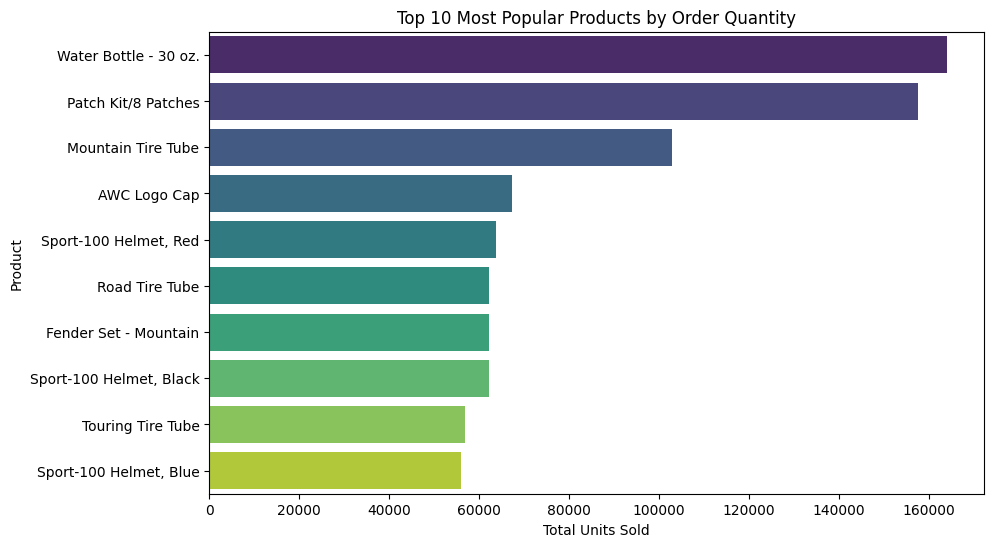

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by Product and calculate total units sold
product_sales = df.groupby('Product')['Order_Quantity'].sum().reset_index()

# Sort by Order_Quantity in descending order
product_sales = product_sales.sort_values(by='Order_Quantity', ascending=False).head(10)  # Top 10 products

# Create a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Order_Quantity', y='Product', data=product_sales, palette='viridis')
plt.title('Top 10 Most Popular Products by Order Quantity')
plt.xlabel('Total Units Sold')
plt.ylabel('Product')
plt.show()

/var/folders/qh/x4phc7lj3cncffrbgl7xmf2r0000gn/T/ipykernel_4321/78141049.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Order_Quantity', y='Age_Group', data=age_group_sales, palette='coolwarm')


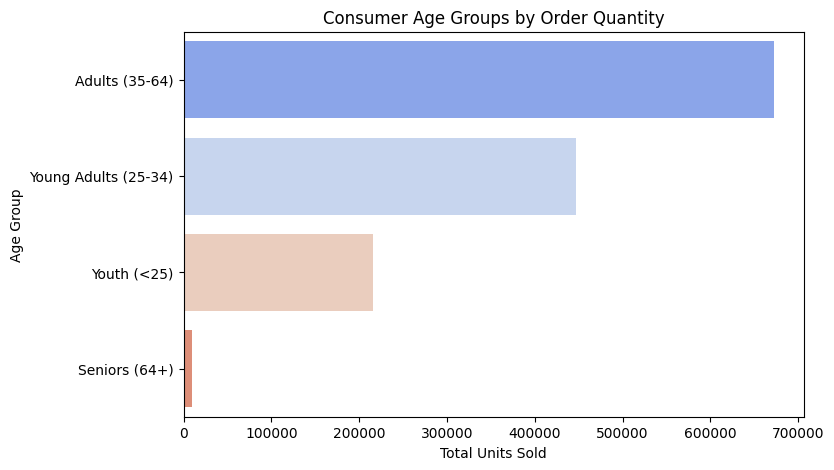

In [21]:
# Group by Age_Group and calculate total units sold
age_group_sales = df.groupby('Age_Group')['Order_Quantity'].sum().reset_index()

# Sort by Order_Quantity in descending order
age_group_sales = age_group_sales.sort_values(by='Order_Quantity', ascending=False)

# Create a bar plot
plt.figure(figsize=(8, 5))
sns.barplot(x='Order_Quantity', y='Age_Group', data=age_group_sales, palette='coolwarm')
plt.title('Consumer Age Groups by Order Quantity')
plt.xlabel('Total Units Sold')
plt.ylabel('Age Group')
plt.show()

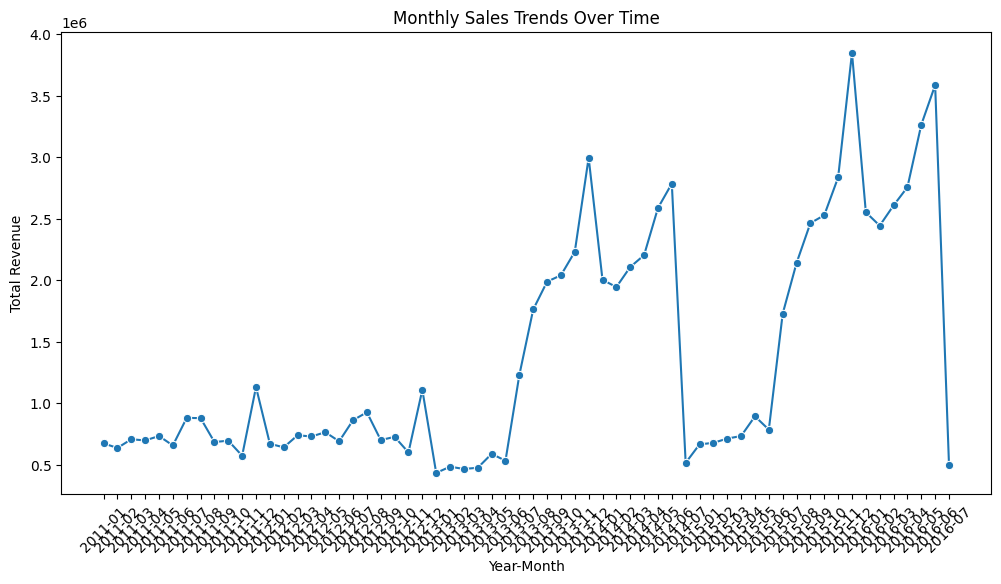

In [22]:
# Group by Year and Month, then calculate total revenue
df['Date'] = pd.to_datetime(df['Date'])  # Convert Date column to datetime
df['YearMonth'] = df['Date'].dt.to_period('M')  # Extract Year-Month
monthly_sales = df.groupby('YearMonth')['Revenue'].sum().reset_index()

# Convert YearMonth back to string for plotting
monthly_sales['YearMonth'] = monthly_sales['YearMonth'].astype(str)

# Create a line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='YearMonth', y='Revenue', data=monthly_sales, marker='o')
plt.title('Monthly Sales Trends Over Time')
plt.xlabel('Year-Month')
plt.ylabel('Total Revenue')
plt.xticks(rotation=45)
plt.show()

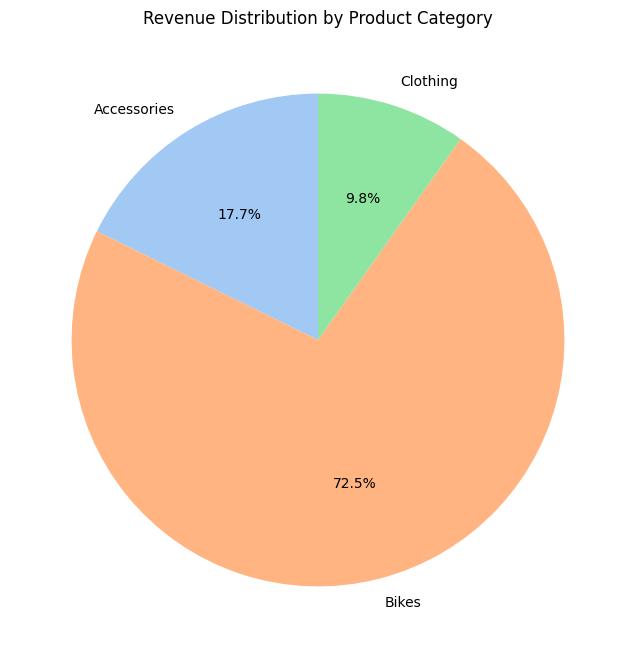

In [23]:
# Group by Product_Category and calculate total revenue
category_revenue = df.groupby('Product_Category')['Revenue'].sum().reset_index()

# Create a pie chart
plt.figure(figsize=(8, 8))
plt.pie(category_revenue['Revenue'], labels=category_revenue['Product_Category'], autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Revenue Distribution by Product Category')
plt.show()

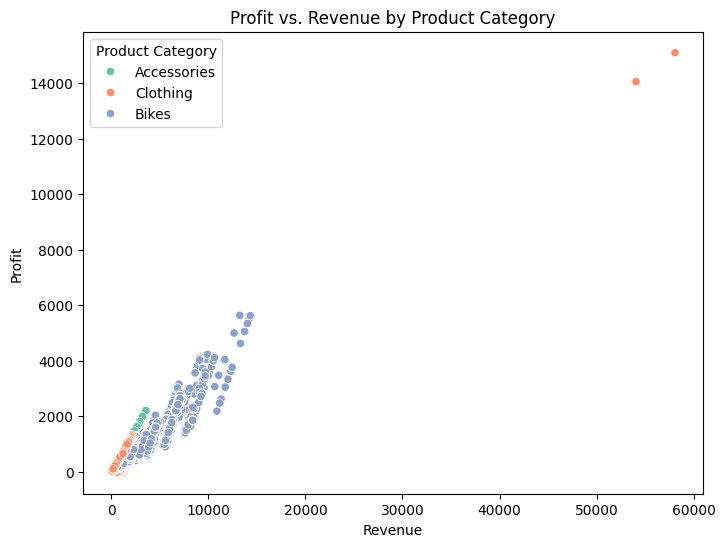

In [24]:
# Create a scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Revenue', y='Profit', data=df, hue='Product_Category', palette='Set2')
plt.title('Profit vs. Revenue by Product Category')
plt.xlabel('Revenue')
plt.ylabel('Profit')
plt.legend(title='Product Category')
plt.show()

/var/folders/qh/x4phc7lj3cncffrbgl7xmf2r0000gn/T/ipykernel_4321/366721744.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Age_Group', y='Order_Quantity', data=df, palette='Blues')


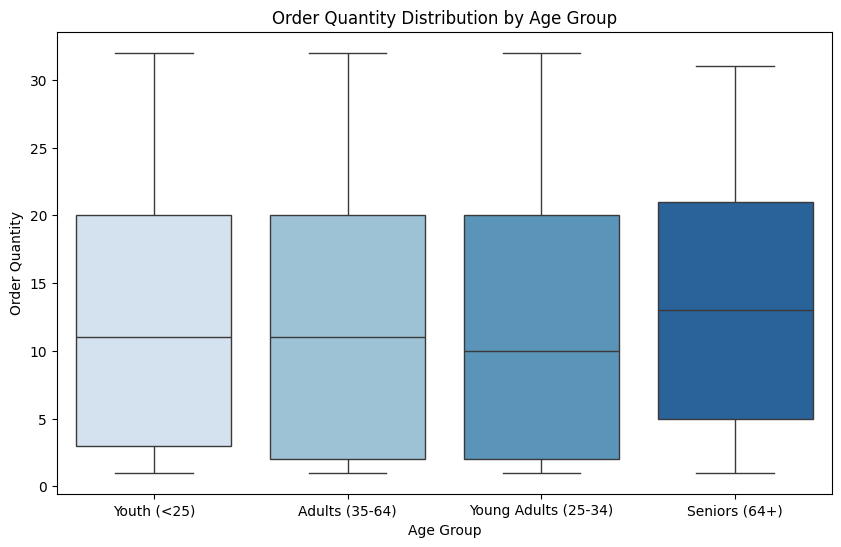

In [25]:
# Create a box plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Age_Group', y='Order_Quantity', data=df, palette='Blues')
plt.title('Order Quantity Distribution by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Order Quantity')
plt.show()

In [28]:
import pandas as pd

# Assuming df is your DataFrame

# Step 1: Group by 'Country' and 'Product_Category' and calculate total sales (or Order_Quantity)
country_product_sales = df.groupby(['Country', 'Product_Category'])['Order_Quantity'].sum().reset_index()

# Step 2: Sort the values by 'Country' and 'Order_Quantity' in descending order
country_product_sales_sorted = country_product_sales.sort_values(by=['Country', 'Order_Quantity'], ascending=[True, False])

# Step 3: For each country, get the top 3 products by total sales/quantity
top_3_products_per_country = country_product_sales_sorted.groupby('Country').head(3)

# Display the result
print(top_3_products_per_country)


           Country Product_Category  Order_Quantity
0        Australia      Accessories          203062
2        Australia         Clothing           50367
1        Australia            Bikes           10156
3           Canada      Accessories          153872
5           Canada         Clothing           36142
4           Canada            Bikes            2245
6           France      Accessories          101433
8           France         Clothing           23750
7           France            Bikes            3812
9          Germany      Accessories           98682
11         Germany         Clothing           22865
10         Germany            Bikes            4173
12  United Kingdom      Accessories          122364
14  United Kingdom         Clothing           30021
13  United Kingdom            Bikes            4833
15   United States      Accessories          374749
17   United States         Clothing           91598
16   United States            Bikes           11192


/var/folders/qh/x4phc7lj3cncffrbgl7xmf2r0000gn/T/ipykernel_4321/937575557.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_3_products_per_country,


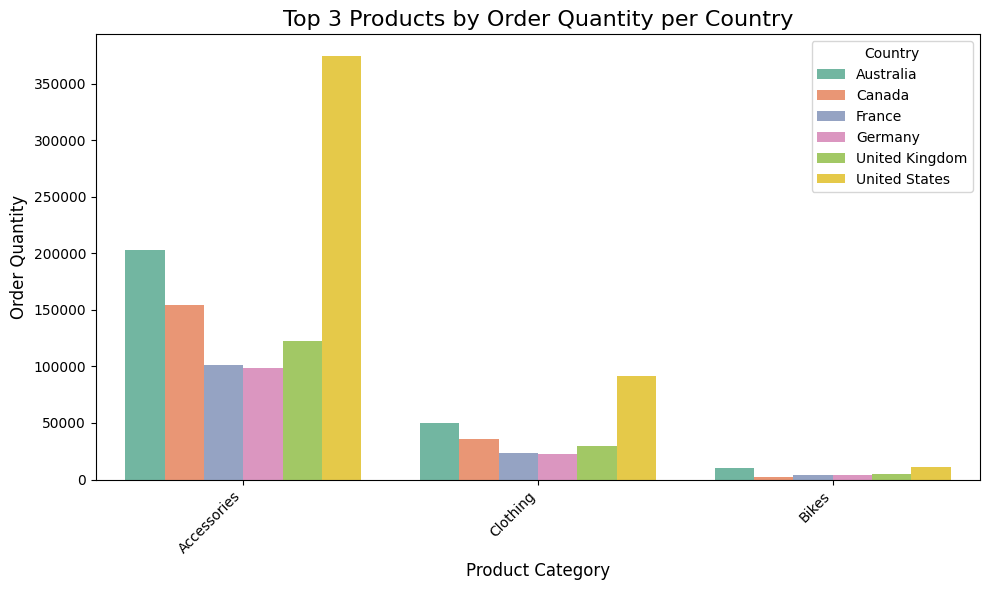

In [36]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Step 1: Group by 'Country' and 'Product_Category' and calculate total Order_Quantity
country_product_sales = df.groupby(['Country', 'Product_Category'])['Order_Quantity'].sum().reset_index()

# Step 2: Sort the values by 'Country' and 'Order_Quantity' in descending order
country_product_sales_sorted = country_product_sales.sort_values(by=['Country', 'Order_Quantity'], ascending=[True, False])

# Step 3: For each country, get the top 3 products by total Order_Quantity
top_3_products_per_country = country_product_sales_sorted.groupby('Country').head(3)

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size

# Step 4: Create a bar plot using Seaborn
sns.barplot(data=top_3_products_per_country, 
            x='Product_Category', 
            y='Order_Quantity', 
            hue='Country',  # Color by country
            ci=None,  # Disable confidence intervals
            palette="Set2")  # Choose a color palette

# Customize the plot
plt.title('Top 3 Products by Order Quantity per Country', fontsize=16)
plt.xlabel('Product Category', fontsize=12)
plt.ylabel('Order Quantity', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit everything

# Show the plot
plt.show()


/var/folders/qh/x4phc7lj3cncffrbgl7xmf2r0000gn/T/ipykernel_4321/2835838838.py:20: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=top_product_per_country,


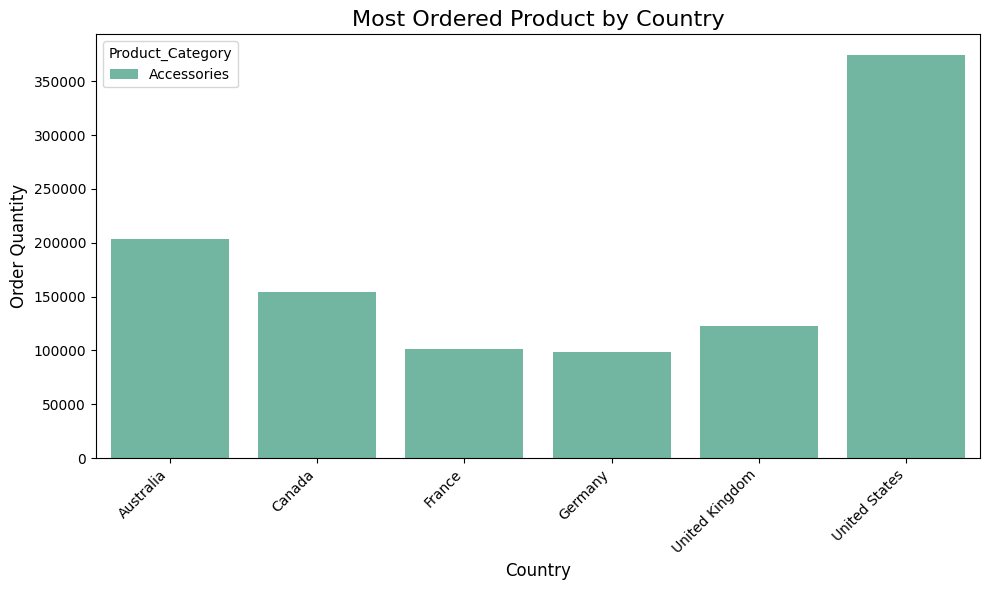

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is your DataFrame

# Step 1: Group by 'Country' and 'Product_Category' and calculate total Order_Quantity
country_product_sales = df.groupby(['Country', 'Product_Category'])['Order_Quantity'].sum().reset_index()

# Step 2: Sort the values by 'Country' and 'Order_Quantity' in descending order
country_product_sales_sorted = country_product_sales.sort_values(by=['Country', 'Order_Quantity'], ascending=[True, False])

# Step 3: For each country, get the top product (highest Order_Quantity)
top_product_per_country = country_product_sales_sorted.groupby('Country').head(1)

# Step 4: Plotting
plt.figure(figsize=(10, 6))  # Set the figure size

# Step 5: Create a bar plot using Seaborn for the top product in each country
sns.barplot(data=top_product_per_country, 
            x='Country', 
            y='Order_Quantity', 
            hue='Product_Category',  # Color by product category
            ci=None,  # Disable confidence intervals
            palette="Set2")  # Choose a color palette

# Customize the plot
plt.title('Most Ordered Product by Country', fontsize=16)
plt.xlabel('Country', fontsize=12)
plt.ylabel('Order Quantity', fontsize=12)
plt.xticks(rotation=45, ha='right')  # Rotate the x-axis labels for better readability
plt.tight_layout()  # Adjust layout to fit everything

# Show the plot
plt.show()


/var/folders/qh/x4phc7lj3cncffrbgl7xmf2r0000gn/T/ipykernel_4321/3441878326.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_3_countries_all, x='Country', y='Order_Quantity', palette="viridis")


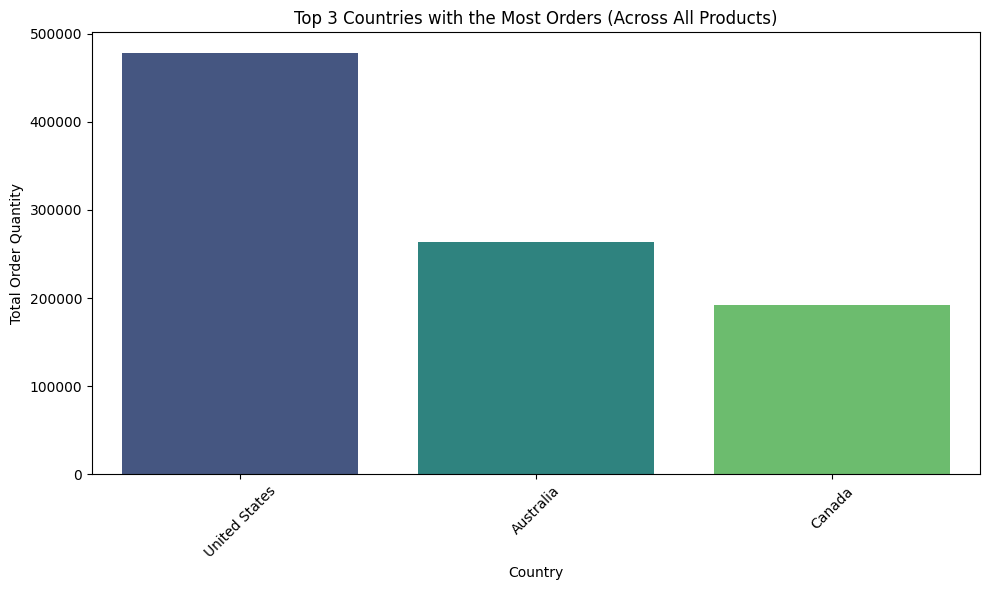

         Country  Order_Quantity
5  United States          477539
0      Australia          263585
1         Canada          192259


In [38]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group by 'Country' and calculate the total 'Order_Quantity' for all products
country_sales = df.groupby('Country')['Order_Quantity'].sum().reset_index()

# Step 2: Sort by 'Order_Quantity' in descending order to get the top countries
top_3_countries_all = country_sales.sort_values(by='Order_Quantity', ascending=False).head(3)

# Step 3: Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=top_3_countries_all, x='Country', y='Order_Quantity', palette="viridis")
plt.title('Top 3 Countries with the Most Orders (Across All Products)')
plt.xlabel('Country')
plt.ylabel('Total Order Quantity')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Print the result to check the data
print(top_3_countries_all)


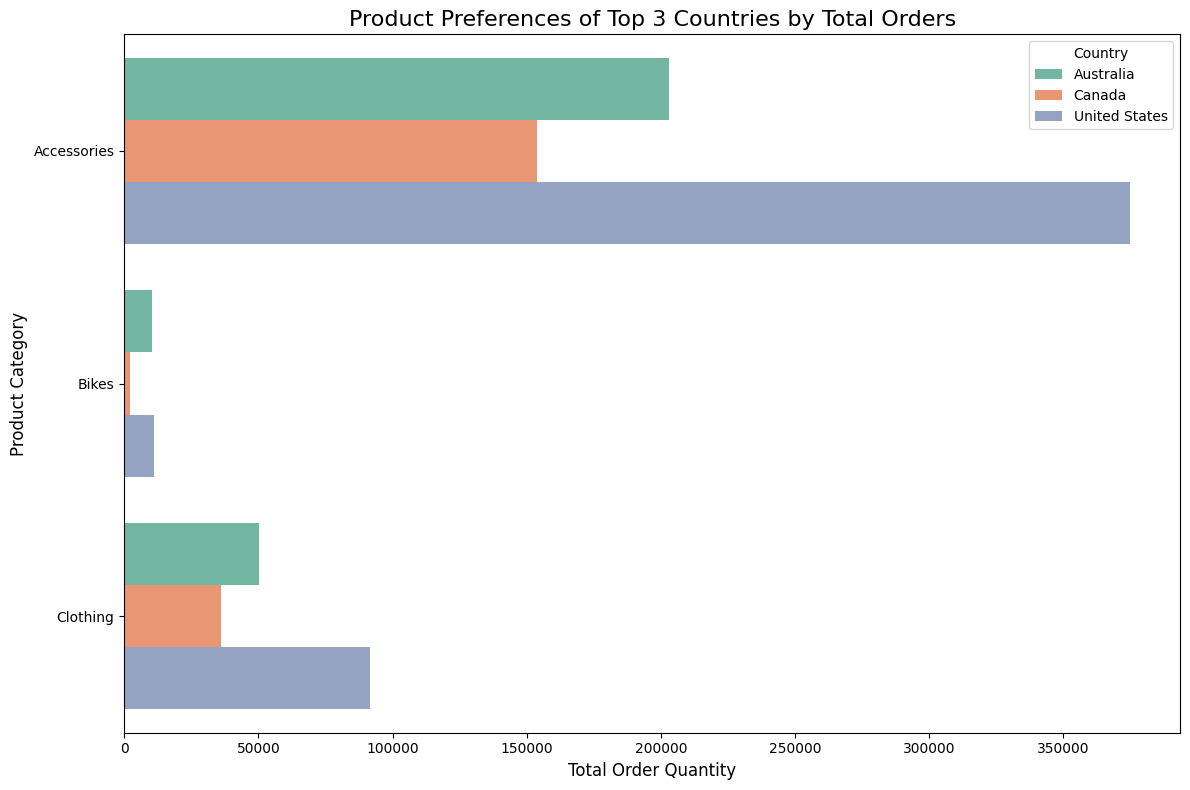

         Country Product_Category  Order_Quantity
0      Australia      Accessories          203062
1      Australia            Bikes           10156
2      Australia         Clothing           50367
3         Canada      Accessories          153872
4         Canada            Bikes            2245
5         Canada         Clothing           36142
6  United States      Accessories          374749
7  United States            Bikes           11192
8  United States         Clothing           91598


In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Group by 'Country' and calculate total 'Order_Quantity' for each country
country_sales = df.groupby('Country')['Order_Quantity'].sum().reset_index()

# Step 2: Sort by 'Order_Quantity' to find the top 3 countries
top_3_countries_all = country_sales.sort_values(by='Order_Quantity', ascending=False).head(3)

# Step 3: Filter data to include only the top 3 countries
top_countries_df = df[df['Country'].isin(top_3_countries_all['Country'])]

# Step 4: Group by 'Country' and 'Product_Category' to calculate the total order quantity for each combination
country_product_preferences = top_countries_df.groupby(['Country', 'Product_Category'])['Order_Quantity'].sum().reset_index()

# Step 5: Plotting the preferences for the top 3 countries
plt.figure(figsize=(12, 8))

# Step 6: Create a horizontal bar plot to show the product preferences for each country
sns.barplot(data=country_product_preferences, 
            x='Order_Quantity', 
            y='Product_Category', 
            hue='Country', 
            orient='h', 
            palette="Set2")

# Customize the plot
plt.title('Product Preferences of Top 3 Countries by Total Orders', fontsize=16)
plt.xlabel('Total Order Quantity', fontsize=12)
plt.ylabel('Product Category', fontsize=12)
plt.tight_layout()

# Show the plot
plt.show()

# Print the data for verification
print(country_product_preferences)
